In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

credit_data = pd.read_excel('german_credit_data.xlsx')
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# EDA and Cleaning

In [285]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [286]:
credit_data.shape

(1000, 10)

In [287]:
credit_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [288]:
#Modifying the null 
credit_data['Saving accounts'] = credit_data['Saving accounts'].fillna('Others')
credit_data['Checking account'] = credit_data['Checking account'].fillna('Others')

In [289]:
#Changing catergorical values to numerical values
credit_data['Risk'] = credit_data['Risk'].map({'bad':1, 'good':0})
credit_data['Sex'] = credit_data['Sex'].map({'male':1, 'female':0})

In [290]:
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,Others,little,1169,6,radio/TV,0
1,22,0,2,own,little,moderate,5951,48,radio/TV,1
2,49,1,1,own,little,Others,2096,12,education,0
3,45,1,2,free,little,little,7882,42,furniture/equipment,0
4,53,1,2,free,little,little,4870,24,car,1


# Histograms

<AxesSubplot:xlabel='Purpose', ylabel='Count'>

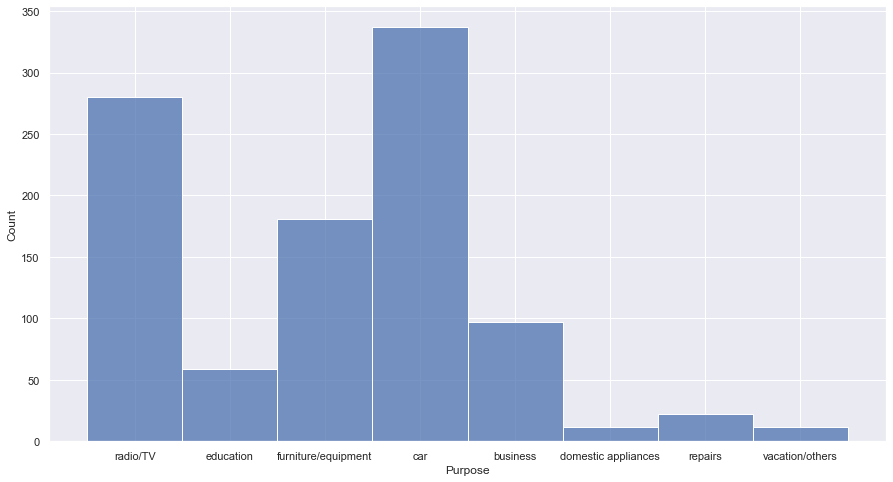

In [291]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x=credit_data['Purpose'], data=credit_data)

The most of credit purpose is related to Car Purchase

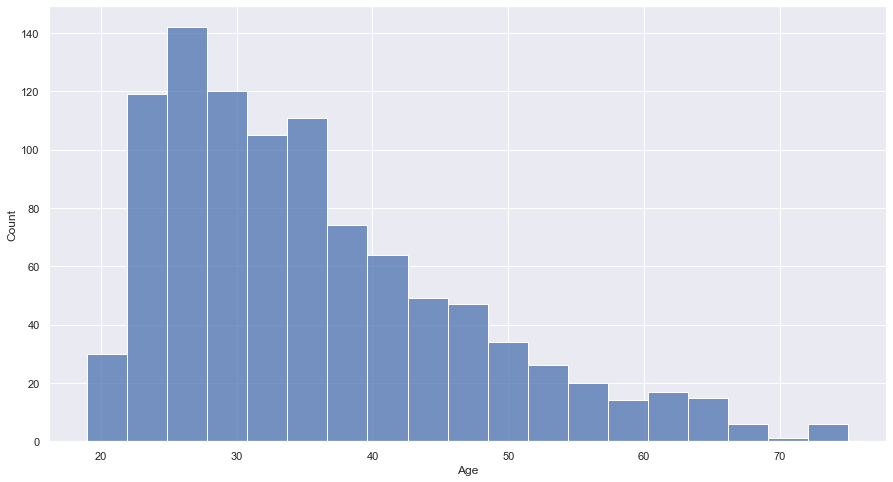

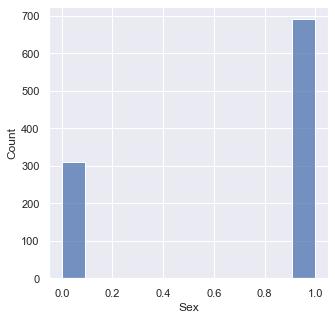

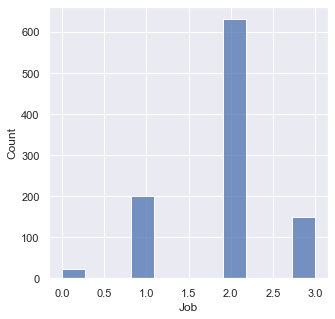

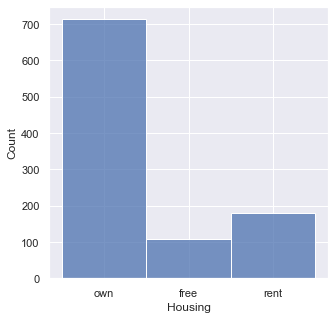

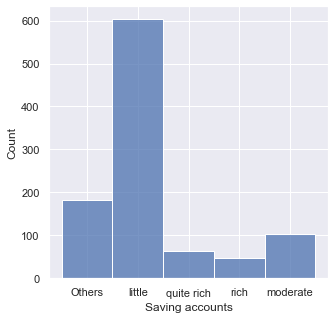

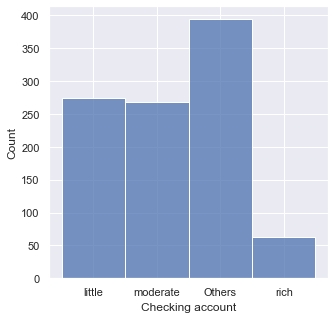

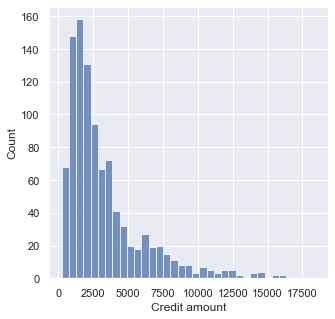

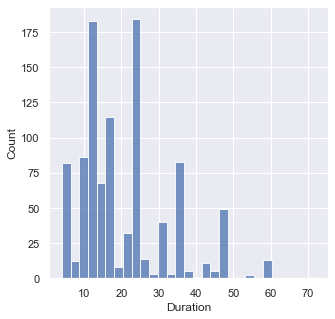

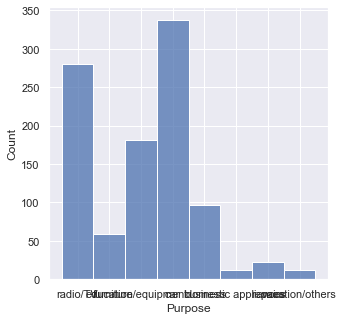

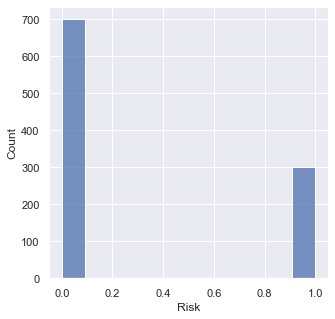

In [292]:
for i, col in enumerate(credit_data.columns):
    plt.figure(i)
    sns.set(rc = {'figure.figsize':(5,5)})
    sns.histplot(x=col, data=credit_data)

We can find skewness in Age and Credit Amount

# Log Transformation

In [293]:
import numpy as np
credit_data['Credit amount'] = np.log(credit_data['Credit amount'])
credit_data['Age'] = np.log(credit_data['Age'])

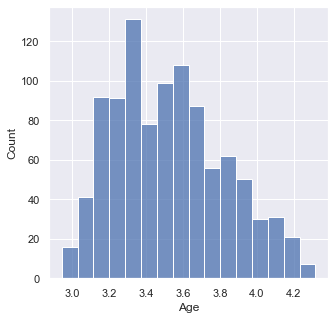

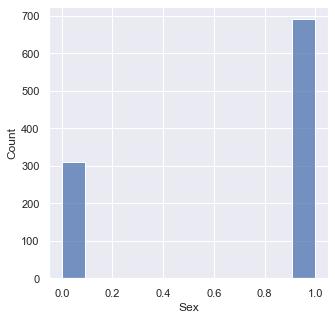

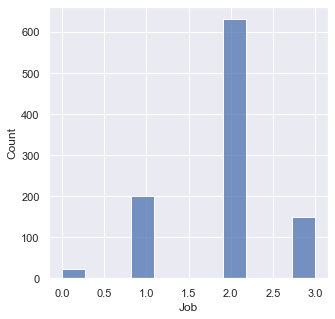

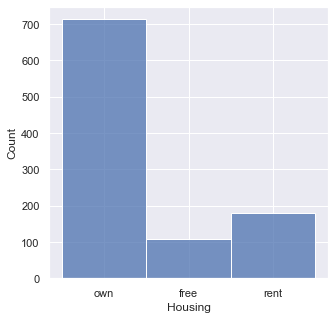

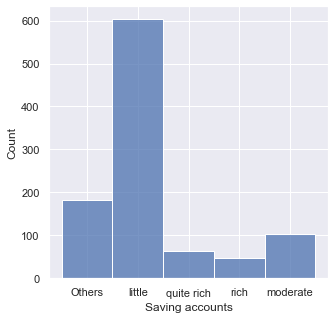

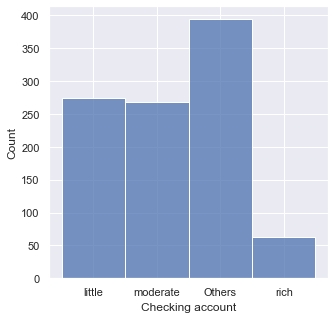

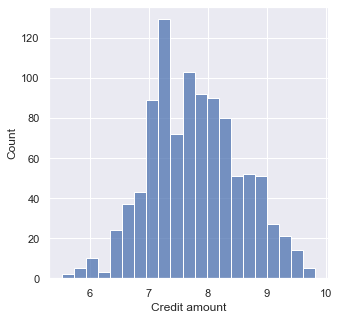

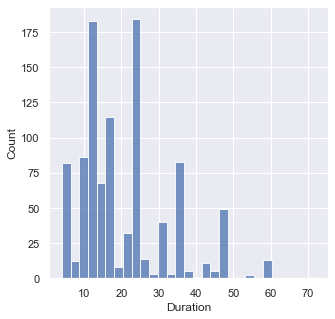

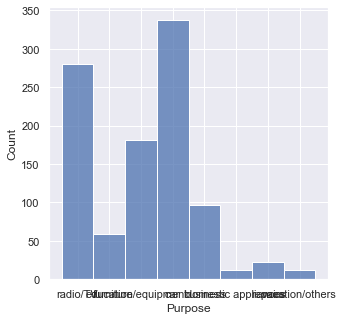

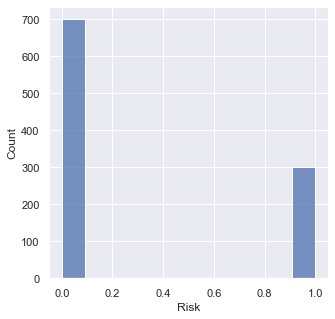

In [294]:
for i, col in enumerate(credit_data.columns):
    plt.figure(i)
    sns.set(rc = {'figure.figsize':(5,5)})
    sns.histplot(x=col, data=credit_data)

# Standard Scaler

In [295]:
credit_data_drop = credit_data.drop(['Risk','Saving accounts','Checking account','Purpose','Housing'], axis=1)
credit_data_drop

,Age,Sex,Job,Credit amount,Duration
0,4.204693,1,2,7.063904,6
1,3.091042,0,2,8.691315,48
2,3.891820,1,1,7.647786,12
3,3.806662,1,2,8.972337,42
4,3.970292,1,2,8.490849,24
...,...,...,...,...,...
995,3.433987,0,1,7.459339,12
996,3.688879,1,3,8.257645,30
997,3.637586,1,2,6.689599,12
998,3.135494,1,2,7.520235,45


In [296]:
from sklearn.preprocessing import StandardScaler

standard_scaler_credit = StandardScaler()
standard_scaler_credit = standard_scaler_credit.fit_transform(credit_data_drop)
print(standard_scaler_credit)

[[ 2.27100592  0.67028006  0.14694918 -0.933901   -1.23647786]
 [-1.44615223 -1.49191369  0.14694918  1.16304581  2.24819436]
 [ 1.22669602  0.67028006 -1.38377145 -0.1815588  -0.73866754]
 ...
 [ 0.37810951  0.67028006  0.14694918 -1.4161991  -0.73866754]
 [-1.29778048  0.67028006  0.14694918 -0.34591111  1.9992892 ]
 [-0.76258638  0.67028006  0.14694918  0.82450846  1.9992892 ]]


# Clustering

In [297]:
numeric =credit_data[[ 'Job','Sex','Age','Credit amount', 'Duration']]
numeric

,Job,Sex,Age,Credit amount,Duration
0,2,1,4.204693,7.063904,6
1,2,0,3.091042,8.691315,48
2,1,1,3.891820,7.647786,12
3,2,1,3.806662,8.972337,42
4,2,1,3.970292,8.490849,24
...,...,...,...,...,...
995,1,0,3.433987,7.459339,12
996,3,1,3.688879,8.257645,30
997,2,1,3.637586,6.689599,12
998,2,1,3.135494,7.520235,45


In [298]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
numeric=mm.fit_transform(numeric)

In [299]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(numeric)
    Sum_of_squared_distances.append(km.inertia_)

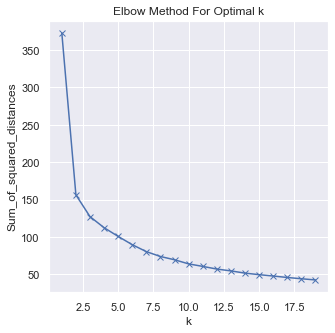

In [300]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [301]:
km=KMeans(n_clusters=5, max_iter=10000,random_state=None)
km.fit_transform(numeric)

array([[0.34420539, 1.24008269, 0.71579171, 1.05465616, 0.64950902],
       [1.28276351, 0.48584902, 1.09061741, 0.7689016 , 1.15439394],
       [0.19137537, 1.14395513, 0.64066345, 1.03443415, 0.49052809],
       ...,
       [0.2828437 , 1.07091097, 0.56197014, 1.03696745, 0.2943168 ],
       [0.69761874, 1.06986645, 0.46090242, 1.20187248, 0.4556139 ],
       [0.65688017, 1.07819701, 0.29773851, 1.17504383, 0.47883452]])

There are no Negative Values
Best Number of Clusters = 1

# PCA

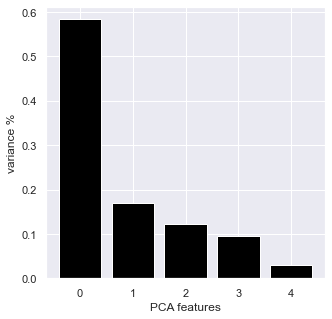

In [302]:
from sklearn.decomposition import PCA
pca = PCA()
Components = pca.fit_transform(numeric)

# Plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features) 
PCA_components = pd.DataFrame(Components)

Optimum Number of cluster is 1 because varaince drops down from 0 to 1 

In [303]:
pca.explained_variance_ratio_

array([0.5830955 , 0.16980322, 0.12202343, 0.09495431, 0.03012355])

In [304]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

# XGBoost Classifier with KFoldCV

In [305]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
import numpy as np

In [309]:
#Changing catergorical values to numerical values
credit_data['Housing'] = credit_data['Housing'].map({'free':2, 'own':1,'rent':1})
credit_data['Saving accounts'] = credit_data['Saving accounts'].map({'little':0, 'moderate':1,'Others':2,'quite rich': 3,'rich':4})
credit_data['Checking account'] = credit_data['Checking account'].map({'little':0, 'moderate':1,'Others':2,'rich': 3})
credit_data['Purpose'] = credit_data['Purpose'].map({'business':0, 'car':1,'domestic appliances':2,'education': 3,
                                                     'furniture/equipment':4, 'radio/TV':5,'repairs':6,'vacation/others': 7})

In [310]:
X = credit_data.drop(['Risk'],axis=1)
y = credit_data['Risk']

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [312]:
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform (X_test)

In [313]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), np.std(n_scores)))
model.fit(X_train, y_train)

Accuracy: 0.719 (0.044)


GradientBoostingClassifier()

In [314]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
for val in [model]:
    y_pred = val.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred,average='micro'), 3)
    recall = round(recall_score(y_val, y_pred,average='micro'), 3)
    print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))

A: 0.416 / P: 0.416 / R: 0.416
